**Task:**
   
    Quickly draw maps with PyNGL module
   
**Solution:**
   
    komod module
   
[**Notebook file**](http://nbviewer.ipython.org/urls/raw.github.com/koldunovn/earthpy.org/master/content/earthpy_mitplot.ipynb)

The PyNGL module produce very nice looking maps, and it's capabilities in fine tuning the resulting image in many cases are much better compared to matplotlib Basemap module. However this flexibility come at a price: in order to draw a map of an acceptable appearance one has to write quite a long script, and specify many parameters. Of course once you find your "best ever" set of parameters, you basically copy/paste them from one script to another with only slight modifications. But at some point you get annoyed by this long sheets of code, that by the way do not look very nice in IPython notebooks, and you write a wrapper function.

This is exactly what happens to me, and here I present several functions, that allow you relatively easily to create maps with PyNGL. This functions are part of the [**komod module**](https://github.com/koldunovn/komod), that I wrote for manipulation with MITgsm data. However plotting functions are not MITgcm specific, and can be used for any 2D (and also, as you will see, 3D and 4D) data that have lat/lon coordinates.

In order to make *komod* work you have to first install numpy, scipy, matplotlib and PyNGL. In order to make this tutorial work, you have to have ether gv (viewer of PostScript and PDF files) or ImageMagick (*nix image processing) installed. If you done with this, let's get started :)

Import modules:

In [1]:
import komod
import Nio
from IPython.display import Image
import numpy as np

Basemap is not found, mitbase functions will not work


ImportError: No module named Nio

As an example we are going to use netCDF file of [mean temperature from the World Ocean Atlas 2009](http://data.nodc.noaa.gov/thredds/fileServer/woa/WOA09/NetCDFdata/temperature_annual_5deg.nc) (5 deg. resolution). You can get it with wget:

In [26]:
!wget http://data.nodc.noaa.gov/thredds/fileServer/woa/WOA09/NetCDFdata/temperature_annual_5deg.nc

--2013-03-31 15:12:32--  http://data.nodc.noaa.gov/thredds/fileServer/woa/WOA09/NetCDFdata/temperature_annual_5deg.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 140.90.235.84
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|140.90.235.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1377776 (1.3M) [application/x-netcdf]
Saving to: `temperature_annual_5deg.nc.1'

100%[======================================>] 1,377,776    633K/s   in 2.1s    

2013-03-31 15:12:35 (633 KB/s) - `temperature_annual_5deg.nc.1' saved [1377776/1377776]



We open the file with *Nio* (part of PyNGL), while you can do it with any other module that opens netCDF files (like netCDF4 or scipy.io.netcdf).

In [2]:
ff =Nio.open_file('temperature_annual_5deg.nc')

Get data from the variables (t_mn - is the mean temperature, that we are going to plot):

In [10]:
temp = ff.variables['t_mn'][:]
lat  = ff.variables['lat'][:]
lon  = ff.variables['lon'][:]
lev  = ff.variables['depth'][:]

The *temp* variable has four dimensions (time, depth, lon, lat):

In [12]:
temp.shape

(1, 33, 36, 72)

so we choose first (and the only in this case) field of time and first field of depth (surface).

And plot:

In [13]:
komod.arctpl(lon, lat, temp[0,0,:,:], region = 'Global')

This command creates .ps file (*output.ps* by default) with the map in your working directory. If you have gv installed, then window with the map should pop up. If not, let's convert ps file to png: 

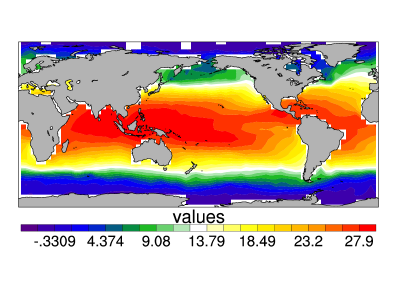

In [5]:
!convert -scale 50% -rotate -90 output.ps output.png
Image(filename='output.png')

Default map already looks fine, except for the name of the variable and a bit strange intervals for the isotherms. It can be easily fixed:

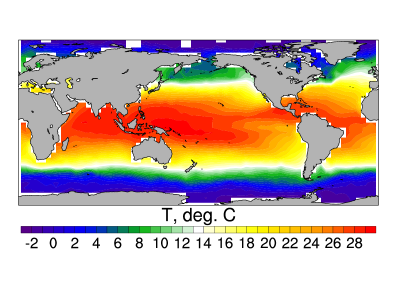

In [6]:
komod.arctpl(lon, lat, temp[0,0,:,:], 
             datamin=-2, datamax=30, datastep=1,
             vtitle='T, deg. C', region = 'Global')

!convert -scale 50% -rotate -90 output.ps output.png
Image(filename='output.png')

If you prefer raster version, where grid boxes are clearly visible:

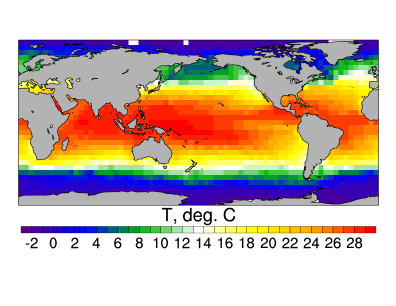

In [44]:
komod.arctpl(lon, lat, temp[0,0,:,:], 
             datamin=-2, datamax=30, datastep=1,
             vtitle='T, deg. C', region = 'Global', raster_fill=True)

!convert -scale 50% -rotate -90 output.ps output.png
Image(filename='output.png')

If you want to change color scheme it's also possible. You have to choose one from [PyNGL color maps](http://www.pyngl.ucar.edu/Graphics/color_table_gallery.shtml), and in some cases also adjust start and end colors:

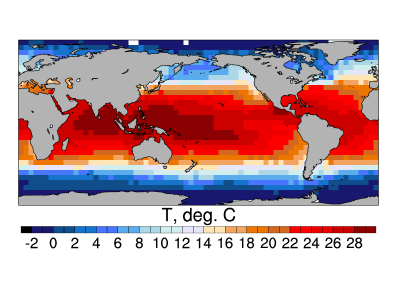

In [49]:
komod.arctpl(lon, lat, temp[0,0,:,:], 
             datamin=-2, datamax=30, datastep=1,
             vtitle='T, deg. C', region = 'Global', raster_fill=True, 
             colormap_name='posneg_1', start_color=4, end_color=-2)

!convert -scale 50% -rotate -90 output.ps output.png
Image(filename='output.png')

If you want to plot some smaller region there are two ways to do it - hard and easy. The easy one is to set *region='Global'* and specify min/max lat and lon:

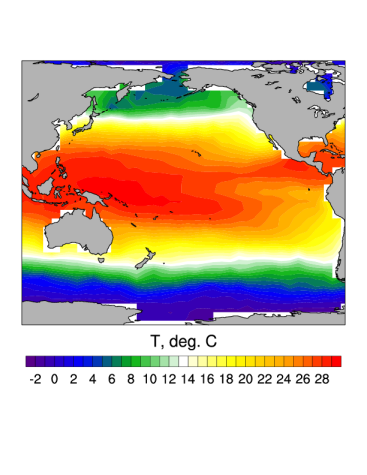

In [60]:
komod.arctpl(lon, lat, temp[0,0,:,:], 
             datamin=-2, datamax=30, datastep=1,
             vtitle='T, deg. C', region = 'Global', 
             minLon=100, maxLon=290 , minLat=-80 , maxLat=75)

!convert -scale 60% -rotate -0 output.ps output.png
Image(filename='output.png')

However polar regions will look ugly and there is still problem with plotting over 0 meridian. For longitudes only 0-360 format is supported, so something like minLon=-20, maxLon=20 will not work :(

Hard way is to use predefined regions:

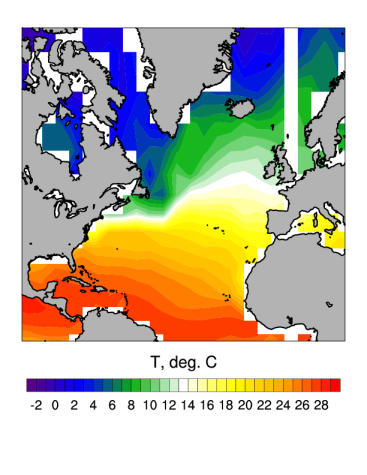

In [4]:
komod.arctpl(lon, lat, temp[0,0,:,:], 
             datamin=-2, datamax=30, datastep=1,
             vtitle='T, deg. C', region = 'NAtlanticOcean')

!convert -scale 60% -rotate -0 output.ps output.png
Image(filename='output.png')

In order to get rid of the ugly break at the 0 longitude, we have to add cyclic points:

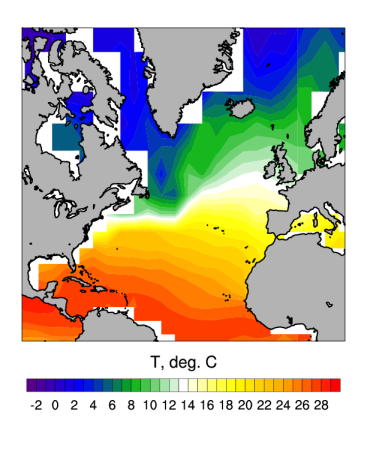

In [7]:
komod.arctpl(lon, lat, temp[0,0,:,:], 
             datamin=-2, datamax=30, datastep=1,
             vtitle='T, deg. C', region = 'NAtlanticOcean', add_cyclic=True)

!convert -scale 60% -rotate -0 output.ps output.png
Image(filename='output.png')

While it look not that hard (you just define *region* variable), actually creating this regions is a bit of the pain. You have to go in to the komod/mtplot.py file and define it by specifying several map related parameters in *reg* function. In return your get a bit more advanced control over the projection and some other characteristics of the region. In the future I hope to make just separate configuration file with this parameters.

One more thing that I have to mention, is that you can provide not only one, but several fields to arctpl, and all of them will be plotted:

In [15]:
komod.arctpl(lon, lat, temp[0,0:5,:,:], region = 'Global')

As a result you will get .ps file with several pages:

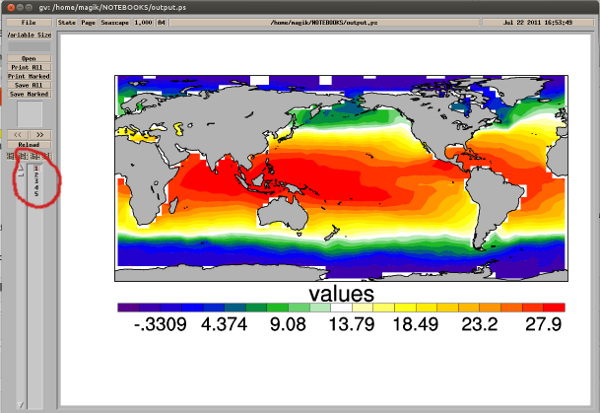

In [17]:
Image(filename='earthpy_mitplot1.png')

You can indicate depth of the fields by setting *levon=True* and by providing values from your depth variable (*lev* in our case): 

In [18]:
komod.arctpl(lon, lat, temp[0,0:5,:,:], region = 'Global',
             levon=True, llevel=lev[0:5])

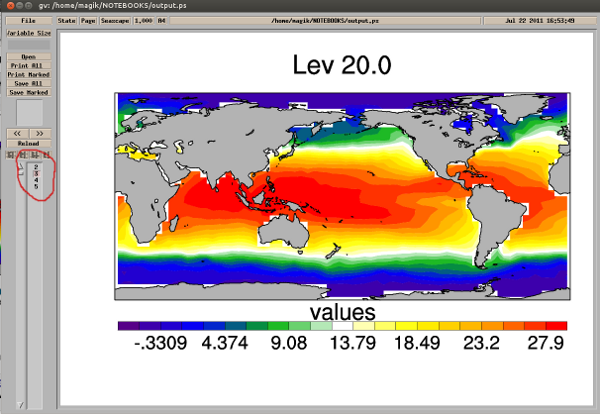

In [20]:
Image(filename='earthpy_mitplot2.png')

There is another function in komod, that provide similar capabilities, but work directly with netCDF file - *arctpltnc*. You have to specify file name, name of the data variable and names of the coordinate variables. Then cross your fingers and run it. If everything is fine and your netCDF file is more or less standard, this function should plot every field that it will find in there (might take veeery long time).

In [22]:
komod.arctpltnc('temperature_annual_5deg.nc', 't_mn', 
                lon='lon', lat='lat', llevel="depth", 
                region = 'Global', add_cyclic=True, levon=True)

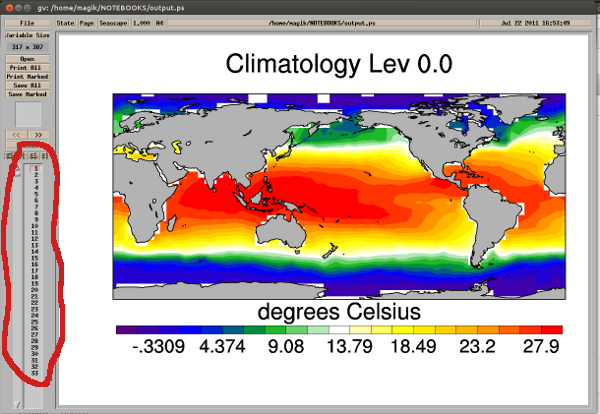

In [23]:
Image(filename='earthpy_mitplot3.png')

It will put time stamp (Climatology in out case) and level as figure title, and content of the *.units* attribute from the data variable, as units. You can tune figures the same way as you do for *arctplt*. 

Next time I will show you how to use komod to plot the grid of your data and make a transect.